In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from keras.layers import Input,Flatten,Dense,Conv2D,BatchNormalization,LeakyReLU,Dropout,MaxPooling2D,Activation
from keras.models import Model
from keras.utils import  to_categorical
from keras.optimizers import Adam,SGD
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [9]:
train_data = 'D:/Datasets/Covid-19/archive (4)/Data/train'
test_data = 'D:/Datasets/Covid-19/archive (4)/Data/test'

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [12]:
test_datagen = ImageDataGenerator(rescale=(1./255))

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 5144 images belonging to 3 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1288 images belonging to 3 classes.


In [16]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [17]:
train_generator[0]

(array([[[[0.28287676, 0.28287676, 0.28287676],
          [0.33453435, 0.33453435, 0.33453435],
          [0.37559694, 0.37559694, 0.37559694],
          ...,
          [0.5675353 , 0.5675353 , 0.5675353 ],
          [0.54245406, 0.54245406, 0.54245406],
          [0.5700904 , 0.5700904 , 0.5700904 ]],
 
         [[0.23814924, 0.23814924, 0.23814924],
          [0.30897576, 0.30897576, 0.30897576],
          [0.35216823, 0.35216823, 0.35216823],
          ...,
          [0.56910086, 0.56910086, 0.56910086],
          [0.59640783, 0.59640783, 0.59640783],
          [0.610226  , 0.610226  , 0.610226  ]],
 
         [[0.18593997, 0.18593997, 0.18593997],
          [0.26950946, 0.26950946, 0.26950946],
          [0.3268959 , 0.3268959 , 0.3268959 ],
          ...,
          [0.6097312 , 0.6097312 , 0.6097312 ],
          [0.6235465 , 0.6235465 , 0.6235465 ],
          [0.6353907 , 0.6353907 , 0.6353907 ]],
 
         ...,
 
         [[0.6114594 , 0.6114594 , 0.6114594 ],
          [0.58974

In [18]:
i, l = next(train_generator)

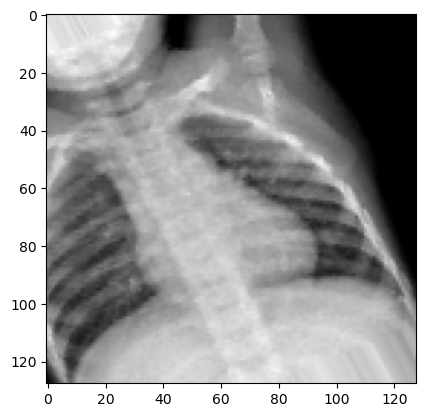

In [19]:
plt.imshow(i[0])

In [20]:
class_labels = train_generator.class_indices

In [21]:
class_labels 

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [23]:
input_layer = Input(shape=(128,128,3))

conv_layer_1 = Conv2D(
    filters = 2 ,
    kernel_size = (3,3) ,
    strides = 1 ,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 3,
    kernel_size = (2,2) ,
    strides = 1 ,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

In [24]:
model = Model(input_layer,output_layer)

In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 2)         │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 3)         │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         491,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491,613 (1.88 MB)

 Trainable params: 491,613 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
opt = Adam(learning_rate=0.005)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])  